In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_galaxy_colors

In [23]:
data = fetch_sdss_galaxy_colors()
type(data)

numpy.ndarray

In [24]:
dataframe = pd.DataFrame.from_records(data)
type(dataframe)

pandas.core.frame.DataFrame

In [25]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
u               50000 non-null float64
g               50000 non-null float64
r               50000 non-null float64
i               50000 non-null float64
z               50000 non-null float64
specClass       50000 non-null object
redshift        50000 non-null float64
redshift_err    50000 non-null float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [5]:
dataframe.head()

,u,g,r,i,z,specClass,redshift,redshift_err
0,18.36716,16.15226,15.06507,14.51372,14.05285,GALAXY,0.027258,0.000014
1,19.53237,17.64661,16.59679,16.07399,15.67989,GALAXY,0.056678,0.000018
2,17.92471,16.89563,16.34107,16.06352,15.82847,GALAXY,0.024477,0.000004
3,19.35062,17.90006,17.33493,16.98621,16.73307,GALAXY,0.081448,0.000013
4,18.87871,17.66926,17.05803,16.73153,16.41729,GALAXY,0.027761,0.000005


In [6]:
dataframe['specClass'].value_counts()

GALAXY    42238
QSO        7762
Name: specClass, dtype: int64

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
u               50000 non-null float64
g               50000 non-null float64
r               50000 non-null float64
i               50000 non-null float64
z               50000 non-null float64
specClass       50000 non-null object
redshift        50000 non-null float64
redshift_err    50000 non-null float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [8]:
data = data[::10]  # truncate for plotting

# Extract colors and spectral class
ug = data['u'] - data['g']
gr = data['g'] - data['r']
spec_class = data['specClass']

galaxies = (spec_class == 'GALAXY')
qsos = (spec_class == 'QSO')

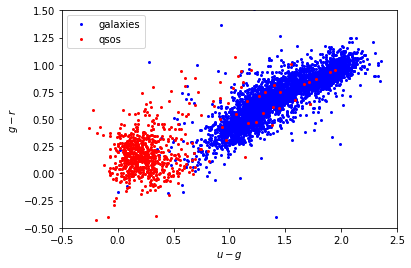

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 1.5)

ax.plot(ug[galaxies], gr[galaxies], '.', ms=4, c='b', label='galaxies')
ax.plot(ug[qsos], gr[qsos], '.', ms=4, c='r', label='qsos')

ax.legend(loc=2)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

plt.show()

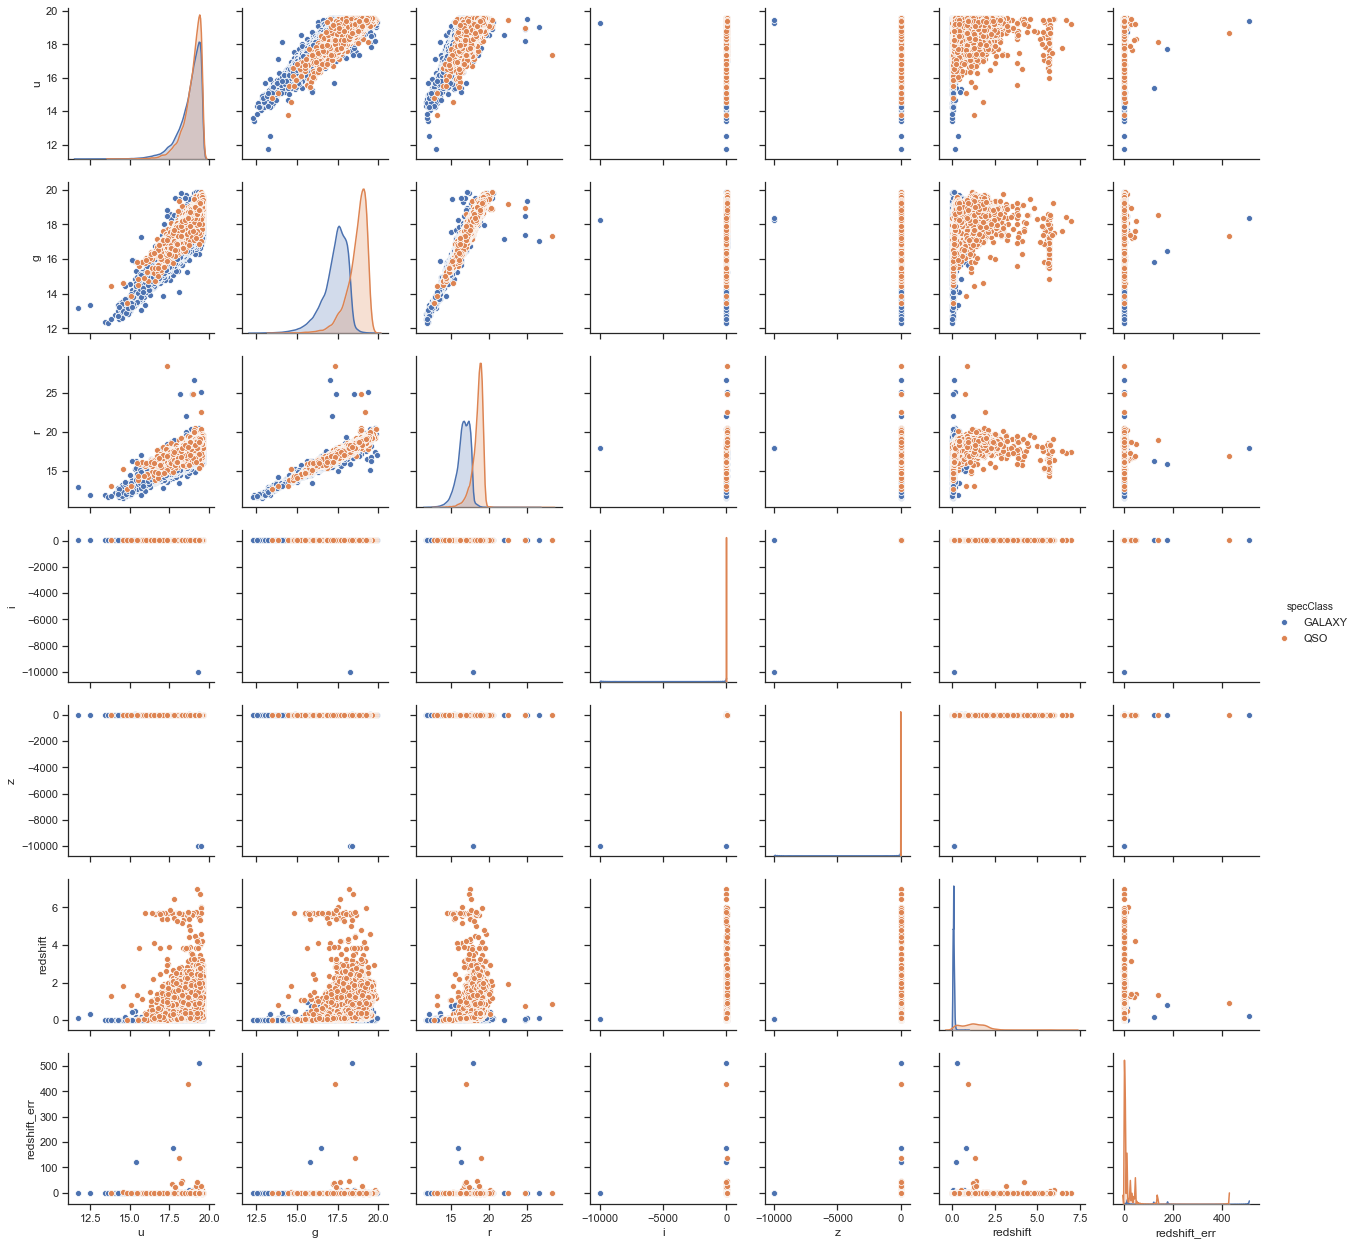

In [10]:
sns.set(style="ticks")

sns.pairplot(dataframe, hue="specClass")

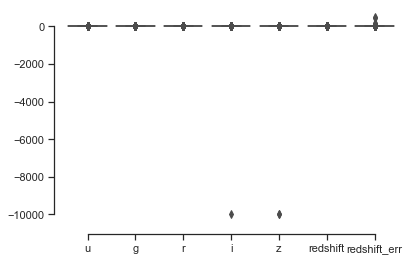

In [11]:
sns.boxplot(palette=["m", "g"],
            data=dataframe)
sns.despine(offset=10, trim=True)

In [12]:
d = {'GALAXY': 1, 'QSO': 0}
dataframe['specClass'] = dataframe['specClass'].map(d)

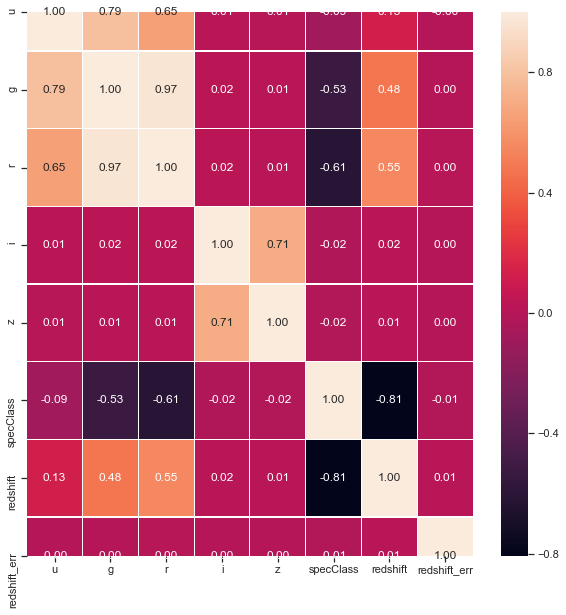

In [13]:
f,ax = plt.subplots(figsize = (10, 10))
sns.heatmap(dataframe.corr(), annot = True, linewidths = .2, fmt = '.2f')
plt.show()

In [14]:
galaxy = dataframe[(dataframe['specClass'] == 1)]

In [15]:
galaxy.head()

,u,g,r,i,z,specClass,redshift,redshift_err
0,18.36716,16.15226,15.06507,14.51372,14.05285,1,0.027258,0.000014
1,19.53237,17.64661,16.59679,16.07399,15.67989,1,0.056678,0.000018
2,17.92471,16.89563,16.34107,16.06352,15.82847,1,0.024477,0.000004
3,19.35062,17.90006,17.33493,16.98621,16.73307,1,0.081448,0.000013
4,18.87871,17.66926,17.05803,16.73153,16.41729,1,0.027761,0.000005


In [16]:
qsos = dataframe[(dataframe['specClass'] == 0)]

In [17]:
qsos.head()

,u,g,r,i,z,specClass,redshift,redshift_err
9,18.42238,18.22688,18.16234,18.02632,17.98409,0,1.927210,0.000392
27,19.22342,19.01674,18.70262,18.65875,18.62971,0,1.227615,0.000327
29,19.46411,19.24191,19.19376,19.01704,19.03733,0,1.659050,0.000446
33,19.41890,19.26654,18.84102,18.86815,18.98317,0,1.131862,0.000548
38,18.71876,18.28190,18.26961,18.24140,18.19143,0,0.670502,0.000092


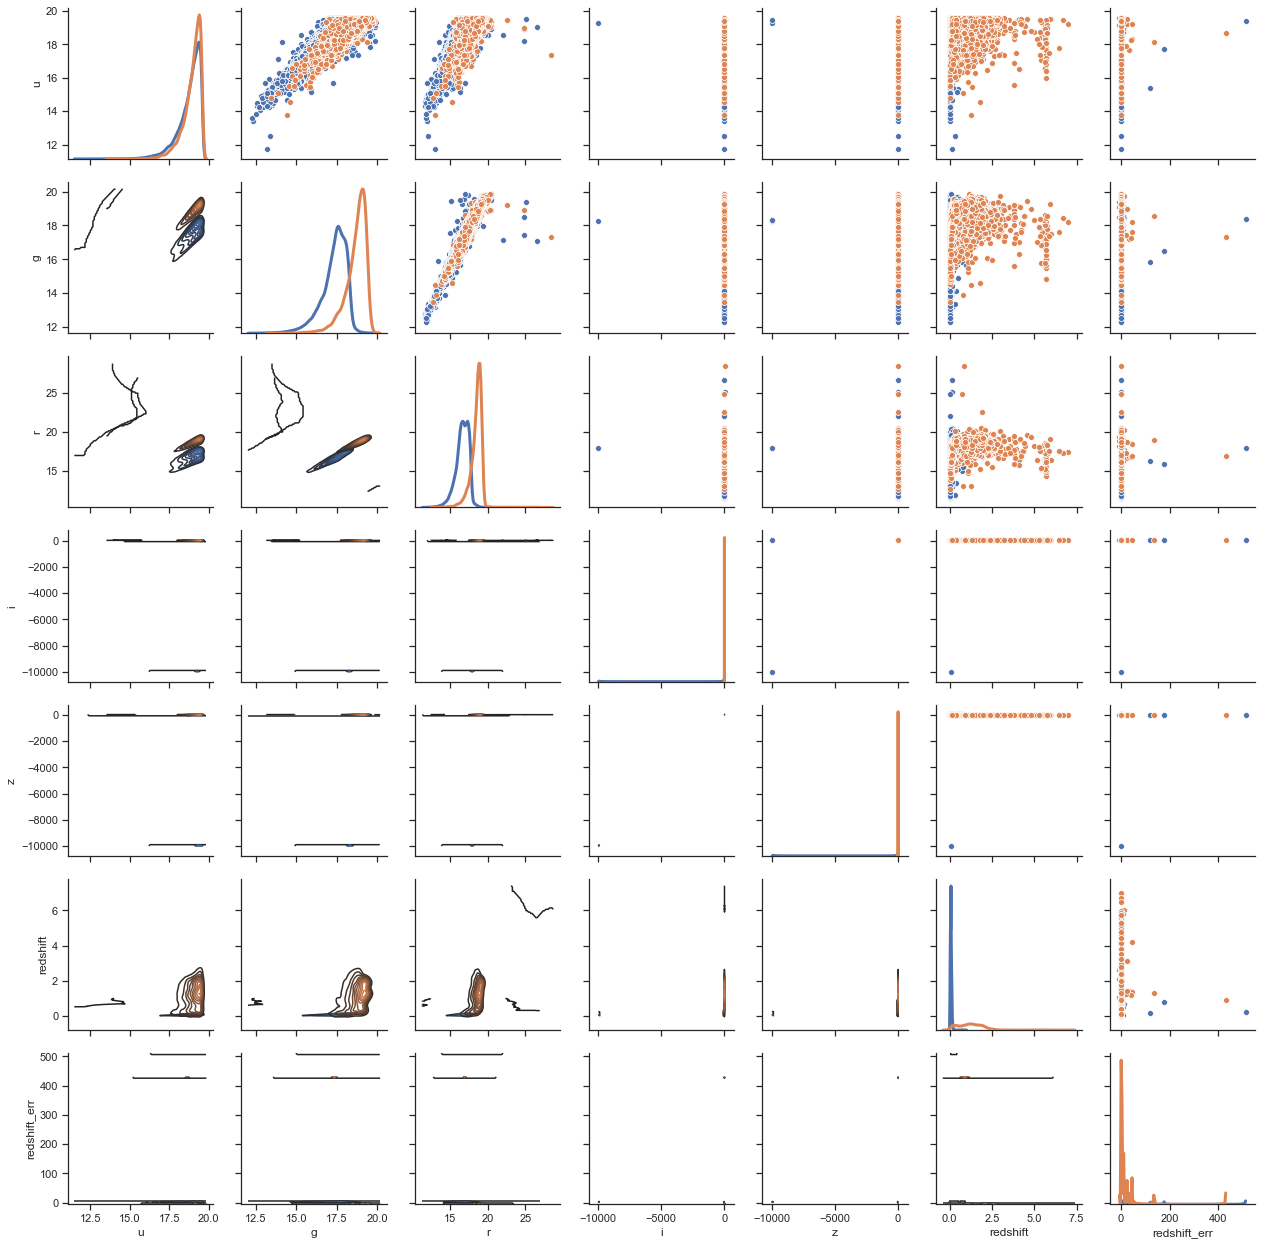

In [26]:
g = sns.PairGrid(dataframe, hue="specClass", diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)